# Loan prediction

In [171]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [172]:
#load dataset
df_loan=pd.read_csv("loan_prediction.csv")
df_loan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [173]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [174]:
#Checking for NA values, and there are none.
df_loan.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [175]:
for col in df_loan.columns:
    print("Column data type :",df_loan[col].dtype,"   column name :",col,"   Null values: ",df_loan[col].isnull().sum())

Column data type : object    column name : Loan_ID    Null values:  0
Column data type : object    column name : Gender    Null values:  13
Column data type : object    column name : Married    Null values:  3
Column data type : object    column name : Dependents    Null values:  15
Column data type : object    column name : Education    Null values:  0
Column data type : object    column name : Self_Employed    Null values:  32
Column data type : int64    column name : ApplicantIncome    Null values:  0
Column data type : float64    column name : CoapplicantIncome    Null values:  0
Column data type : float64    column name : LoanAmount    Null values:  22
Column data type : float64    column name : Loan_Amount_Term    Null values:  14
Column data type : float64    column name : Credit_History    Null values:  50
Column data type : object    column name : Property_Area    Null values:  0
Column data type : object    column name : Loan_Status    Null values:  0


In [176]:
#Lets describe the dataset
df_loan.describe()
#there is difference between mean value and median so there can outliers present in the data set

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [177]:
#Lets check the corrrelation matrix
df_loan.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


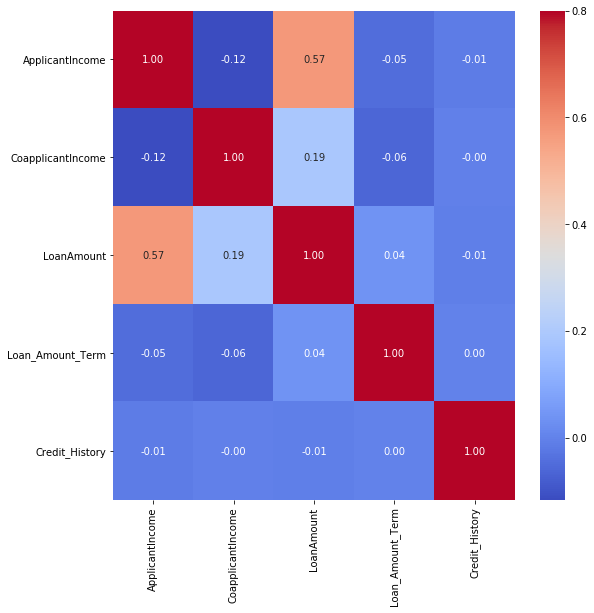

In [178]:
f,ax=plt.subplots(figsize=(9,9))
sns.heatmap(df_loan.corr(),vmax=.8,fmt=".2f",annot=True,cmap = "coolwarm")

In [179]:
#frequency of categories
for col in df_loan.columns:
    if df_loan[col].dtype=="object":
        print(df_loan[col].value_counts())
        print()

LP002689    1
LP002789    1
LP002453    1
LP001688    1
LP002840    1
           ..
LP002447    1
LP001674    1
LP002958    1
LP002031    1
LP002606    1
Name: Loan_ID, Length: 614, dtype: int64

Male      489
Female    112
Name: Gender, dtype: int64

Yes    398
No     213
Name: Married, dtype: int64

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

No     500
Yes     82
Name: Self_Employed, dtype: int64

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

Y    422
N    192
Name: Loan_Status, dtype: int64



In [180]:
#frequency of categories
for col in df_loan.columns:
    if df_loan[col].dtype=="float64":
        print(df_loan[col].value_counts())
        print()

0.0       273
1666.0      5
2083.0      5
2500.0      5
1750.0      3
         ... 
7166.0      1
2138.0      1
2166.0      1
3541.0      1
3021.0      1
Name: CoapplicantIncome, Length: 287, dtype: int64

120.0    20
110.0    17
100.0    15
187.0    12
160.0    12
         ..
570.0     1
300.0     1
376.0     1
117.0     1
311.0     1
Name: LoanAmount, Length: 203, dtype: int64

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

1.0    475
0.0     89
Name: Credit_History, dtype: int64



In [181]:
df_loan.Gender=df_loan.Gender.map({'Male':1,'Female':0})
df_loan.Gender.value_counts()

1.0    489
0.0    112
Name: Gender, dtype: int64

In [182]:
from random import randint 
df_loan.Gender.fillna(np.random.randint(0,2),inplace=True)
df_loan.Gender.value_counts()

1.0    489
0.0    125
Name: Gender, dtype: int64

In [183]:
df_loan.Married=df_loan.Married.map({'Yes':1,'No':0})
df_loan.Married.value_counts()

1.0    398
0.0    213
Name: Married, dtype: int64

In [184]:
df_loan.Married.fillna(np.random.randint(0,2),inplace=True)
df_loan.Married.value_counts()

1.0    398
0.0    216
Name: Married, dtype: int64

In [185]:
df_loan.Dependents=df_loan.Dependents.map({'0':0,'1':1,'2':2,'3+':3})
df_loan.Dependents.value_counts()

0.0    345
1.0    102
2.0    101
3.0     51
Name: Dependents, dtype: int64

In [186]:
df_loan.Dependents.fillna(df_loan.Dependents.median(),inplace=True)
df_loan.Dependents.value_counts()

0.0    360
1.0    102
2.0    101
3.0     51
Name: Dependents, dtype: int64

In [187]:
df_loan.Self_Employed=df_loan.Self_Employed.map({'Yes':1,'No':0})
df_loan.Self_Employed.value_counts()

0.0    500
1.0     82
Name: Self_Employed, dtype: int64

In [188]:
df_loan.Self_Employed.fillna(np.random.randint(0,2),inplace=True)
df_loan.Self_Employed.value_counts()

0.0    532
1.0     82
Name: Self_Employed, dtype: int64

In [189]:
df_loan.LoanAmount.fillna(df_loan.LoanAmount.median(),inplace=True)

In [190]:
df_loan.Loan_Amount_Term.fillna(df_loan.Loan_Amount_Term.mean(),inplace=True)

In [191]:
df_loan.Credit_History.value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [192]:
df_loan.Credit_History.fillna(np.random.randint(0,2),inplace=True)

In [193]:
df_loan.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [194]:
#Checking for unique values in each column
df_loan.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      11
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [195]:
df_loan.drop('Loan_ID',inplace=True,axis=1)

In [196]:
df_loan.shape

(614, 12)

In [197]:
df_loan

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,Graduate,0.0,5849,0.0,128.0,360.0,1.0,Urban,Y
1,1.0,1.0,1.0,Graduate,0.0,4583,1508.0,128.0,360.0,1.0,Rural,N
2,1.0,1.0,0.0,Graduate,1.0,3000,0.0,66.0,360.0,1.0,Urban,Y
3,1.0,1.0,0.0,Not Graduate,0.0,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,1.0,0.0,0.0,Graduate,0.0,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.0,Graduate,0.0,2900,0.0,71.0,360.0,1.0,Rural,Y
610,1.0,1.0,3.0,Graduate,0.0,4106,0.0,40.0,180.0,1.0,Rural,Y
611,1.0,1.0,1.0,Graduate,0.0,8072,240.0,253.0,360.0,1.0,Urban,Y
612,1.0,1.0,2.0,Graduate,0.0,7583,0.0,187.0,360.0,1.0,Urban,Y


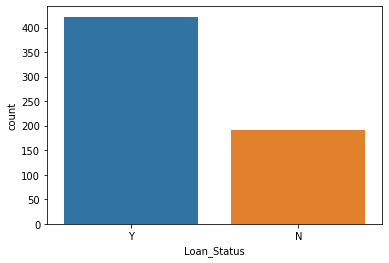

In [198]:
#loan approval status 
sns.countplot(x="Loan_Status",data=df_loan)
plt.show()
#we see almost 50% loan rejected cases

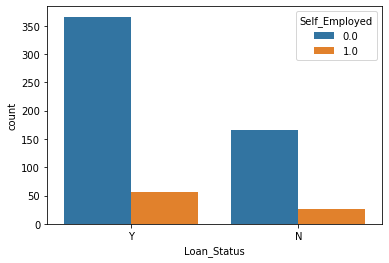

In [199]:
#loan approval status wrt self employed people
sns.countplot(x="Loan_Status",hue="Self_Employed",data=df_loan)
plt.show()
#self employed people get more approval for loan

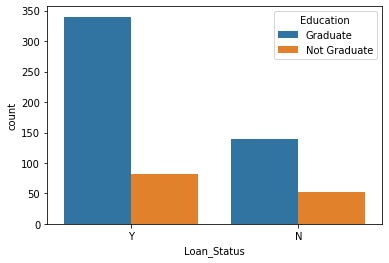

In [200]:
#Lets check the loan approval count based on "Education"
sns.countplot(x="Loan_Status",hue="Education",data=df_loan)
plt.show()
#graduate people get more approval for loan

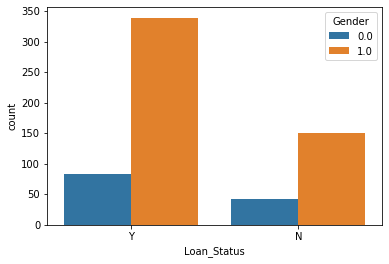

In [201]:
#loan approval status wrt gender
sns.countplot(x="Loan_Status",hue="Gender",data=df_loan)
plt.show()
#there are more number of males getting loan approval than comapred to female

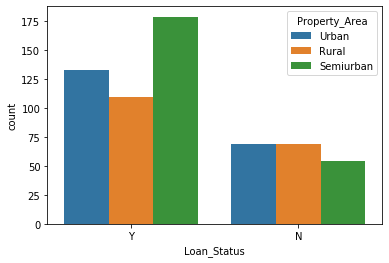

In [202]:
#lets chcek the loan approval status based on property area
sns.countplot(x="Loan_Status",hue="Property_Area",data=df_loan)
plt.show()
#semi urban people get more loan approval than urban people followed by rural

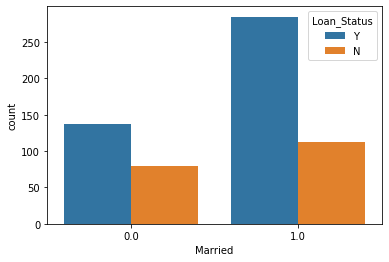

In [203]:
#Lets chcek the loan approval count based on marital status
sns.countplot(x="Married",hue="Loan_Status",data=df_loan)
plt.show()
#married people are getting more loan approval

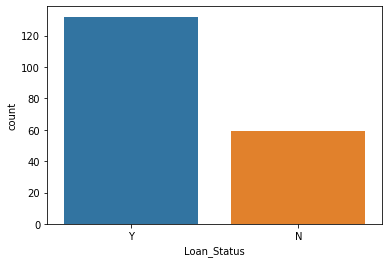

In [204]:
#Lets chcek loan status for applicant income greater than 5000
sns.countplot(x="Loan_Status",data=df_loan.loc[df_loan["ApplicantIncome"]>5000])
plt.show()
#people whose loan was sanctioned are more than double of prople whose loan was not sanctioned

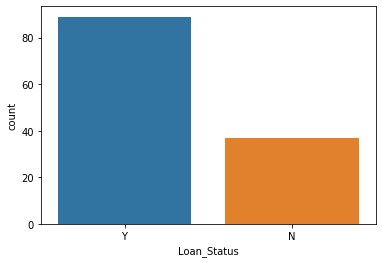

In [205]:
#Lets chcek what is the effect on above count if co-aplicant income is 0
sns.countplot(x="Loan_Status",data=df_loan.loc[(df_loan["ApplicantIncome"]>5000)&(df_loan["CoapplicantIncome"]==0)])
plt.show()
#count reduced but still ratio is almost same

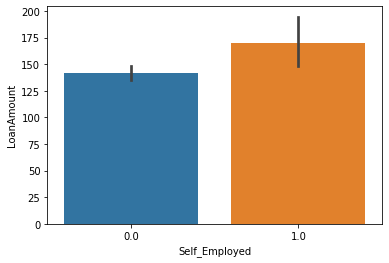

In [206]:
#lets compare the average loan amount between self employed and not self employed
sns.barplot(y="LoanAmount",x="Self_Employed",data=df_loan)
plt.show()
#avaerge loan amount demanded by the self employed is more but there is not too much difference

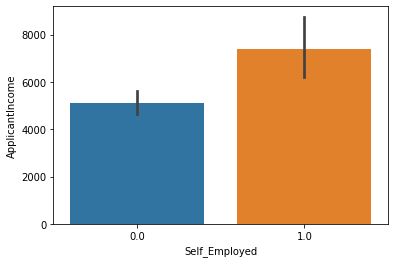

In [207]:
#Lets compare the average income of employed and self employed
sns.barplot(y="ApplicantIncome",x="Self_Employed",data=df_loan)
plt.show()

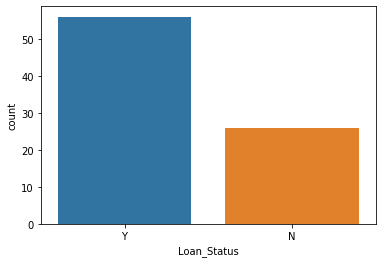

In [208]:
#Lets compare the count of people who got loans and who didn't
sns.countplot(x="Loan_Status",data=df_loan.loc[df_loan["Self_Employed"]==1])
plt.show()
#there are more than double who got loan

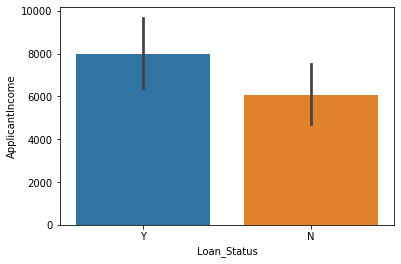

In [209]:
sns.barplot(y="ApplicantIncome",x="Loan_Status",data=df_loan.loc[df_loan["Self_Employed"]==1])
plt.show()
#So people who got loan has averge income more and it is expected

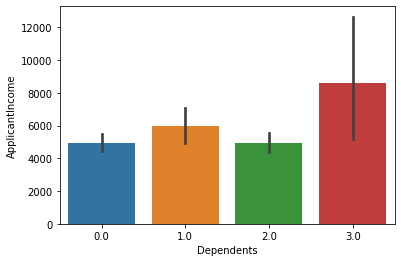

In [210]:
# let's chcek the average loan amount as per Dependents
sns.barplot(y="ApplicantIncome",x="Dependents",data=df_loan)
plt.show()
#Average income of dependents of with 2 is less than with 1

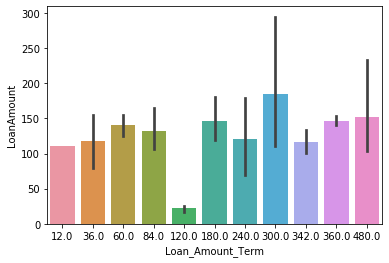

In [211]:
#Average loan amount requested groupped by Loan_Amount_Term
sns.barplot(x="Loan_Amount_Term",y="LoanAmount",data=df_loan)

In [212]:
#lets check the skewness of the dataset
df_loan.skew()

Gender              -1.475893
Married             -0.622252
Dependents           1.015551
Self_Employed        2.159796
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.743053
Loan_Amount_Term    -2.389680
Credit_History      -1.310835
dtype: float64

In [213]:
#dividing it into input and output
df_x=df_loan.drop(columns=["Loan_Status"])
y=df_loan[["Loan_Status"]]

In [214]:
import numpy as np
for index in df_x.skew().index:
    if df_x.skew().loc[index]>0.5:
        df_x[index]=np.log1p(df_x[index])

In [215]:
#lets chcek the skewness
df_x.skew()

Gender              -1.475893
Married             -0.622252
Dependents           0.671985
Self_Employed        2.159796
ApplicantIncome      0.482128
CoapplicantIncome   -0.173073
LoanAmount          -0.151578
Loan_Amount_Term    -2.389680
Credit_History      -1.310835
dtype: float64

In [216]:
#Lets chcek the datatypes in input dataset
df_x.dtypes

Gender               float64
Married              float64
Dependents           float64
Education             object
Self_Employed        float64
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [217]:
df_x=pd.get_dummies(df_x,drop_first=True)

In [218]:
#Lets chcek the shape
df_x.shape

(614, 12)

In [219]:
#lets bring all features to a common scale using
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(df_x)
x=sc.transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)

In [220]:
#lets use labelencoder to convert target class into integers
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(y)
y=le.transform(y)
y

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,

In [221]:
#since it is imbalanced dataset so we will focus on auc-roc score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
def max_aucroc_score(clf,df_x,y):
    max_aucroc_score=0
    for r_state in range(42,100):
        x_train, x_test, y_train, y_test = train_test_split(df_x, y,random_state = r_state,test_size=0.20,stratify=y)
        x_train, y_train = SMOTE().fit_sample(x_train, y_train)
        clf.fit(x_train,y_train)
        y_pred = clf.predict(x_test)
        aucroc_scr=roc_auc_score(y_test,y_pred)
        print("auc roc score corresponding to ",r_state," is ",aucroc_scr)
        if aucroc_scr>max_aucroc_score:
            max_aucroc_score=aucroc_scr
            final_r_state=r_state
    print("max auc roc score corresponding to ",final_r_state," is ",max_aucroc_score)
    return final_r_state

In [222]:
#Lets use logistic regression and check
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")
lg_clf=LogisticRegression()
max_aucroc_score(lg_clf,x,y)

auc roc score corresponding to  42  is  0.7348297213622291
auc roc score corresponding to  43  is  0.7306501547987616
auc roc score corresponding to  44  is  0.6662538699690402
auc roc score corresponding to  45  is  0.7026315789473685
auc roc score corresponding to  46  is  0.6852941176470588
auc roc score corresponding to  47  is  0.6777089783281733
auc roc score corresponding to  48  is  0.6676470588235295
auc roc score corresponding to  49  is  0.7421052631578948
auc roc score corresponding to  50  is  0.6791021671826625
auc roc score corresponding to  51  is  0.6877708978328174
auc roc score corresponding to  52  is  0.7157894736842105
auc roc score corresponding to  53  is  0.7085139318885448
auc roc score corresponding to  54  is  0.6676470588235295
auc roc score corresponding to  55  is  0.7407120743034056
auc roc score corresponding to  56  is  0.6001547987616098
auc roc score corresponding to  57  is  0.6749226006191951
auc roc score corresponding to  58  is  0.63095975232198

77

In [223]:
#lets chcek decision tree
from sklearn.tree import DecisionTreeClassifier
dc=DecisionTreeClassifier()
max_aucroc_score(dc,df_x,y)

auc roc score corresponding to  42  is  0.6147058823529412
auc roc score corresponding to  43  is  0.6060371517027863
auc roc score corresponding to  44  is  0.625077399380805
auc roc score corresponding to  45  is  0.5925696594427246
auc roc score corresponding to  46  is  0.6732198142414861
auc roc score corresponding to  47  is  0.5811145510835913
auc roc score corresponding to  48  is  0.6309597523219814
auc roc score corresponding to  49  is  0.6746130030959752
auc roc score corresponding to  50  is  0.6410216718266253
auc roc score corresponding to  51  is  0.6863777089783282
auc roc score corresponding to  52  is  0.6821981424148607
auc roc score corresponding to  53  is  0.6337461300309598
auc roc score corresponding to  54  is  0.6309597523219814
auc roc score corresponding to  55  is  0.6510835913312693
auc roc score corresponding to  56  is  0.6015479876160991
auc roc score corresponding to  57  is  0.6043343653250774
auc roc score corresponding to  58  is  0.579721362229102

75

In [224]:
#lets use random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
parameters={"n_estimators":[10,100,500]}
rf_clf=RandomForestClassifier()
clf = GridSearchCV(rf_clf, parameters, cv=5,scoring="roc_auc")
clf.fit(df_x,y)
clf.best_params_

{'n_estimators': 500}

In [242]:
rf_clf=RandomForestClassifier(n_estimators=500)
max_aucroc_score(rf_clf,df_x,y)

auc roc score corresponding to  42  is  0.7099071207430339
auc roc score corresponding to  43  is  0.676625386996904
auc roc score corresponding to  44  is  0.6662538699690402
auc roc score corresponding to  45  is  0.6105263157894737
auc roc score corresponding to  46  is  0.6558823529411765
auc roc score corresponding to  47  is  0.6676470588235295
auc roc score corresponding to  48  is  0.6441176470588235
auc roc score corresponding to  49  is  0.6735294117647059
auc roc score corresponding to  50  is  0.6427244582043344
auc roc score corresponding to  51  is  0.6995356037151703
auc roc score corresponding to  52  is  0.6704334365325076
auc roc score corresponding to  53  is  0.6939628482972137
auc roc score corresponding to  54  is  0.6295665634674922
auc roc score corresponding to  55  is  0.7157894736842105
auc roc score corresponding to  56  is  0.6032507739938081
auc roc score corresponding to  57  is  0.6558823529411765
auc roc score corresponding to  58  is  0.609133126934984

88

In [226]:
#Lets use KNN
#For KNN we need to know the best value of k using grid search
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")
kc=KNeighborsClassifier()
neighbors={"n_neighbors":range(1,30)}
clf = GridSearchCV(kc, neighbors, cv=5,scoring="roc_auc")
clf.fit(x,y)
clf.best_params_

{'n_neighbors': 23}

In [243]:
kc=KNeighborsClassifier(n_neighbors=23)
max_aucroc_score(kc,x,y)

auc roc score corresponding to  42  is  0.7261609907120743
auc roc score corresponding to  43  is  0.7174922600619194
auc roc score corresponding to  44  is  0.6925696594427245
auc roc score corresponding to  45  is  0.6160990712074305
auc roc score corresponding to  46  is  0.6631578947368422
auc roc score corresponding to  47  is  0.6455108359133127
auc roc score corresponding to  48  is  0.6102167182662539
auc roc score corresponding to  49  is  0.7143962848297213
auc roc score corresponding to  50  is  0.7126934984520124
auc roc score corresponding to  51  is  0.6908668730650155
auc roc score corresponding to  52  is  0.6642414860681115
auc roc score corresponding to  53  is  0.6656346749226005
auc roc score corresponding to  54  is  0.6396284829721363
auc roc score corresponding to  55  is  0.6628482972136223
auc roc score corresponding to  56  is  0.5987616099071207
auc roc score corresponding to  57  is  0.6863777089783282
auc roc score corresponding to  58  is  0.59876160990712

96

In [228]:
#Lets use SVM
from sklearn.svm import SVC
svc=SVC()
parameters={"kernel":["linear", "poly", "rbf"],"C":[0.001,0.01,0.1,1,10]}
clf = GridSearchCV(svc, parameters, cv=5,scoring="roc_auc")
clf.fit(x,y)
clf.best_params_

{'C': 0.01, 'kernel': 'rbf'}

In [244]:
svc=SVC(kernel="rbf",C=0.01)
max_aucroc_score(svc,x,y)

auc roc score corresponding to  42  is  0.6746130030959752
auc roc score corresponding to  43  is  0.6379256965944272
auc roc score corresponding to  44  is  0.6472136222910216
auc roc score corresponding to  45  is  0.6922600619195046
auc roc score corresponding to  46  is  0.6645510835913312
auc roc score corresponding to  47  is  0.7026315789473685
auc roc score corresponding to  48  is  0.6496904024767802
auc roc score corresponding to  49  is  0.7037151702786378
auc roc score corresponding to  50  is  0.6995356037151703
auc roc score corresponding to  51  is  0.7390092879256966
auc roc score corresponding to  52  is  0.6386996904024768
auc roc score corresponding to  53  is  0.7171826625386997
auc roc score corresponding to  54  is  0.6524767801857586
auc roc score corresponding to  55  is  0.7137770897832818
auc roc score corresponding to  56  is  0.615015479876161
auc roc score corresponding to  57  is  0.6894736842105263
auc roc score corresponding to  58  is  0.545201238390092

76

In [230]:
from sklearn.ensemble import GradientBoostingClassifier
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500,1000]}
gb_clf=GradientBoostingClassifier()
clf = GridSearchCV(gb_clf, parameters, cv=5,scoring="roc_auc")
clf.fit(df_x,y)
clf.best_params_

{'learning_rate': 0.1, 'n_estimators': 10}

In [245]:
gb_clf=GradientBoostingClassifier(learning_rate=0.1,n_estimators=10)
max_aucroc_score(gb_clf,df_x,y)

auc roc score corresponding to  42  is  0.698452012383901
auc roc score corresponding to  43  is  0.651702786377709
auc roc score corresponding to  44  is  0.6575851393188854
auc roc score corresponding to  45  is  0.6780185758513932
auc roc score corresponding to  46  is  0.6707430340557275
auc roc score corresponding to  47  is  0.7029411764705882
auc roc score corresponding to  48  is  0.6385448916408669
auc roc score corresponding to  49  is  0.7393188854489163
auc roc score corresponding to  50  is  0.6852941176470588
auc roc score corresponding to  51  is  0.7054179566563468
auc roc score corresponding to  52  is  0.7157894736842105
auc roc score corresponding to  53  is  0.7365325077399381
auc roc score corresponding to  54  is  0.664860681114551
auc roc score corresponding to  55  is  0.7202786377708978
auc roc score corresponding to  56  is  0.6136222910216718
auc roc score corresponding to  57  is  0.6662538699690402
auc roc score corresponding to  58  is  0.6032507739938081


99

In [232]:
#Lets use ada boosting using decision tree as an estimator
from sklearn.ensemble import AdaBoostClassifier
#parameters={"base_estimator":[dc,lg_clf,svc],"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500,1000]}
ada_clf=AdaBoostClassifier(base_estimator=dc)
max_aucroc_score(ada_clf,df_x,y)

auc roc score corresponding to  42  is  0.6188854489164086
auc roc score corresponding to  43  is  0.6032507739938081
auc roc score corresponding to  44  is  0.6205882352941177
auc roc score corresponding to  45  is  0.6278637770897834
auc roc score corresponding to  46  is  0.6687306501547987
auc roc score corresponding to  47  is  0.6074303405572756
auc roc score corresponding to  48  is  0.6441176470588235
auc roc score corresponding to  49  is  0.6877708978328174
auc roc score corresponding to  50  is  0.6877708978328174
auc roc score corresponding to  51  is  0.6749226006191951
auc roc score corresponding to  52  is  0.6292569659442725
auc roc score corresponding to  53  is  0.5530959752321981
auc roc score corresponding to  54  is  0.6496904024767802
auc roc score corresponding to  55  is  0.6482972136222911
auc roc score corresponding to  56  is  0.5530959752321981
auc roc score corresponding to  57  is  0.5752321981424149
auc roc score corresponding to  58  is  0.60603715170278

64

In [246]:
#lets use cross_val_score for logistic regression
from sklearn.model_selection import cross_val_score
print("Mean roc auc score for logistic classifier: ",cross_val_score(lg_clf,x,y,cv=5,scoring="roc_auc").mean())
print("standard deviation in roc auc score for logistic classifier: ",cross_val_score(lg_clf,x,y,cv=5,scoring="roc_auc").std())
print(cross_val_score(lg_clf,x,y,cv=5,scoring="roc_auc"))

Mean roc auc score for logistic classifier:  0.7509795794161119
standard deviation in roc auc score for logistic classifier:  0.046172392920942044
[0.82631579 0.7130031  0.72863248 0.78174603 0.7052005 ]


In [247]:
#lets use cross_val_score for decision tree
print("Mean auc roc score for decision tree classifier: ",cross_val_score(dc,df_x,y,cv=5,scoring="roc_auc").mean())
print("standard deviation in auc roc score for decision tree classifier: ",cross_val_score(dc,df_x,y,cv=5,scoring="roc_auc").std())
print(cross_val_score(dc,df_x,y,cv=5,scoring="roc_auc"))

Mean auc roc score for decision tree classifier:  0.6245120720352919
standard deviation in auc roc score for decision tree classifier:  0.026758671426415307
[0.5869969  0.5869969  0.65201465 0.63507326 0.60119048]


In [248]:
#lets check cross_val_score for random forest
print("Mean auc roc score for random forest classifier: ",cross_val_score(rf_clf,df_x,y,cv=5,scoring="roc_auc").mean())
print("standard deviation in auc roc score for random forest classifier: ",cross_val_score(rf_clf,df_x,y,cv=5,scoring="roc_auc").std())
print(cross_val_score(rf_clf,df_x,y,cv=5,scoring="roc_auc"))

Mean auc roc score for random forest classifier:  0.7345360100855457
standard deviation in auc roc score for random forest classifier:  0.03941250594886893
[0.77043344 0.66934985 0.74710012 0.75503663 0.72227444]


In [249]:
#lets use cross_val_score for knn 
from sklearn.model_selection import cross_val_score
print("Mean roc auc score for knn classifier: ",cross_val_score(kc,x,y,cv=5,scoring="roc_auc").mean())
print("standard deviation in roc auc score for knn classifier: ",cross_val_score(kc,x,y,cv=5,scoring="roc_auc").std())
print(cross_val_score(kc,x,y,cv=5,scoring="roc_auc"))

Mean roc auc score for knn classifier:  0.7305503766958875
standard deviation in roc auc score for knn classifier:  0.029128819454003026
[0.74458204 0.68606811 0.74389499 0.76862027 0.70958647]


In [250]:
#lets use cross_val_score for svm
from sklearn.model_selection import cross_val_score
print("Mean roc auc score for svm classifier: ",cross_val_score(svc,x,y,cv=5,scoring="roc_auc").mean())
print("standard deviation in roc auc score for svm classifier: ",cross_val_score(svc,x,y,cv=5,scoring="roc_auc").std())
print(cross_val_score(svc,x,y,cv=5,scoring="roc_auc"))

Mean roc auc score for svm classifier:  0.7471069264412918
standard deviation in roc auc score for svm classifier:  0.03058469373318205
[0.79628483 0.7130031  0.75915751 0.7506105  0.7164787 ]


In [251]:
#lets check cross_val_score for gradient boosting
print("Mean auc roc score for gradient boosting classifier: ",cross_val_score(gb_clf,df_x,y,cv=5,scoring="roc_auc").mean())
print("standard deviation in auc roc score for gradient boosting classifier: ",cross_val_score(gb_clf,df_x,y,cv=5,scoring="roc_auc").std())
print(cross_val_score(gb_clf,df_x,y,cv=5,scoring="roc_auc"))

Mean auc roc score for gradient boosting classifier:  0.728746479698492
standard deviation in auc roc score for gradient boosting classifier:  0.053990648858690746
[0.80247678 0.64133127 0.72680098 0.7736569  0.70723684]


In [252]:
# we will use Logistic Regression as our final model
x_train, x_test, y_train, y_test = train_test_split(df_x, y,random_state = 77,test_size=0.20,stratify=y)
x_train, y_train = SMOTE().fit_sample(x_train, y_train)
lr_clf=LogisticRegression()
lr_clf.fit(x_train,y_train)
y_pred=lr_clf.predict(x_test)

In [253]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
print("Confusion matrix \n",confusion_matrix(y_test,y_pred))
print("f1 score is : ",f1_score(y_test,y_pred))
print("classification report \n",classification_report(y_test,y_pred))
print("AUC ROC Score: ",roc_auc_score(y_test,y_pred))

Confusion matrix 
 [[26 12]
 [15 70]]
f1 score is :  0.8383233532934131
classification report 
               precision    recall  f1-score   support

           0       0.63      0.68      0.66        38
           1       0.85      0.82      0.84        85

    accuracy                           0.78       123
   macro avg       0.74      0.75      0.75       123
weighted avg       0.79      0.78      0.78       123

AUC ROC Score:  0.7538699690402476


In [254]:
# save the model
import pickle
filename = 'loan.pkl'
pickle.dump(svc, open(filename, 'wb'))